In [13]:
import requests, json
import pandas as pd
import numpy as np
import decimal
import time
from datetime import datetime, timedelta
from rich import print
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt

# Load environment variables from .env file
load_dotenv()

api_key= os.getenv('taostats_api')

headers = {
            "accept": "application/json",
            "Authorization": api_key
        }

In [7]:
#get current block

url = "https://api.taostats.io/api/block/v1?page=1&limit=1"
response = requests.get(url, headers=headers)
resJson = json.loads(response.text)
current_block = resJson['data'][0]['block_number']
print(current_block)

5112097

In [11]:


netuid = 1
days = 14
block_end = current_block
block_start = current_block - days*7200
emission_history = []



page =1
total_pages = 2
while page <= total_pages:
    url = f"https://api.taostats.io/api/dtao/subnet_emission/v1?netuid={netuid}&block_start={block_start}&block_end={block_end}&page={page}&limit=200"
    response = requests.get(url, headers=headers)
    resJson = json.loads(response.text)
    emissions = resJson['data']
    #get the emissions data
    for emission in emissions:
        temp = float(emission['tao_in_pool'])/1e9* 100
        emission_history.append(temp)

    total_pages = resJson['pagination']['total_pages']
    page +=1
print(len(emission_history))
print(emission_history[0])

#emission history is newest-> olderst.. for a chart we need to reverse it
rev_emissions = emission_history[::-1]

1009

2.1437947

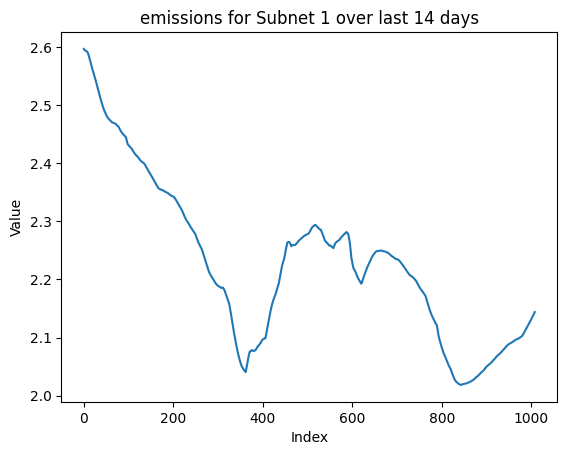

In [16]:
# Create the bar chart

data = rev_emissions
plt.plot(range(len(data)), data)

# Set the title and labels
plt.title(f"Emissions for Subnet {netuid} over last {days} days')
plt.xlabel('Index')
plt.ylabel('Value')

# Show the chart
plt.show()